## AIM

Use a dataset of tweets or Facebook posts and
perform sentiment analysis to determine the
overall sentiment of the posts.

In [7]:
tweet = pd.read_csv(r"C:\Users\DELL\Downloads\Tweets.csv") 

## Import Basic Libraries

In [11]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [34]:
tweet.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
#We Will Change the default plot size to have better view of the plot

In [15]:
plot_size = plt.rcParams["figure.figsize"]
print (plot_size[0])
print (plot_size[1])

(plot_size[0]) = 8
(plot_size[1]) = 6
plt.rcParams["figure.figsize"] = plot_size 

6.4
4.8


## EDA

## PIECHART

<Axes: ylabel='count'>

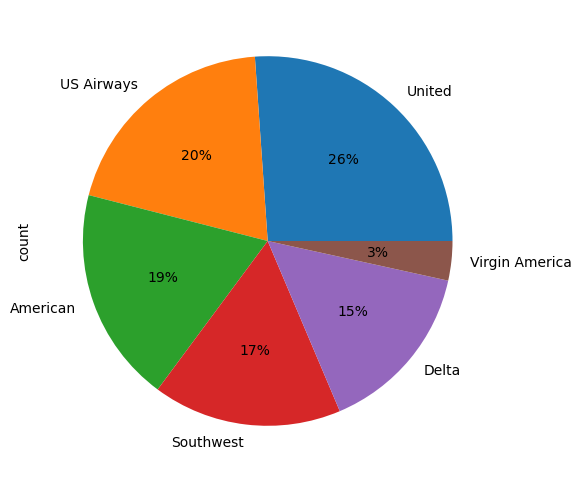

In [20]:
tweet.airline.value_counts().plot(kind='pie' , autopct='%1.0f%%') 

#Distribution of sentiments across all the tweets

## PIE CHART 2

<Axes: ylabel='count'>

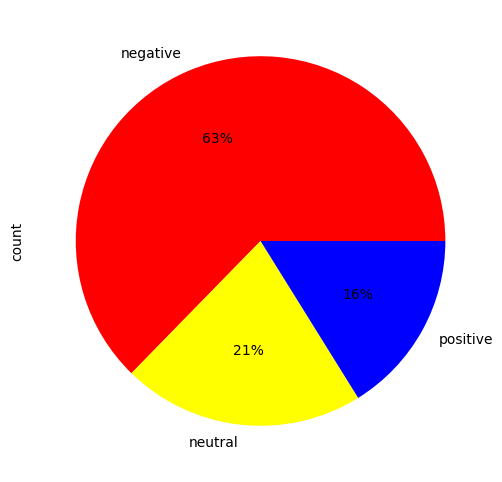

In [46]:
tweet.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%',colors=["red","yellow","blue"]) 


#ARILINE COUNTS POSITIVE,NEGATIVE,NEUTRAL FOR EACH AIRLINE

## BAR GRAPH

<Axes: xlabel='airline'>

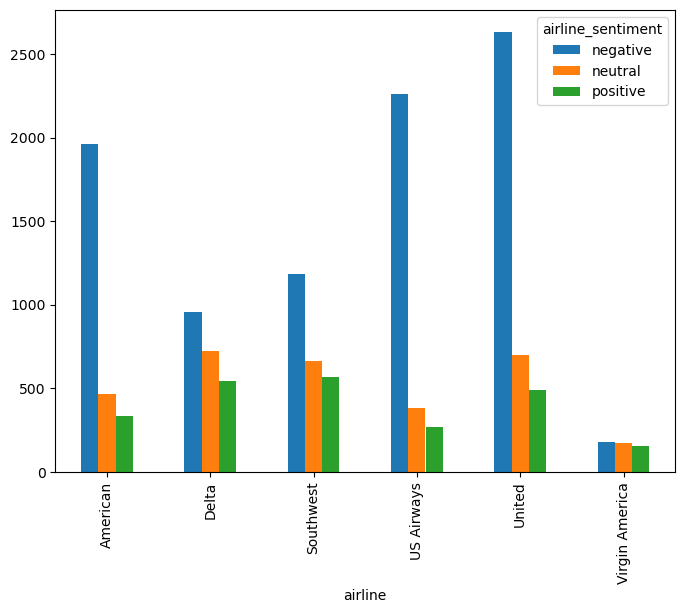

In [42]:
airline_sentiment = tweet.groupby(["airline","airline_sentiment"]).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar') 

#The output says that majority of tweets are negative followed by neutral and then positive tweets ,Virgin America is probably only airline where ratio of sentiments are kind of similiar

## Using Seaborn Library view airline_sentiment_confidence level for tweets belonging to three sentiment categories

<Axes: xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

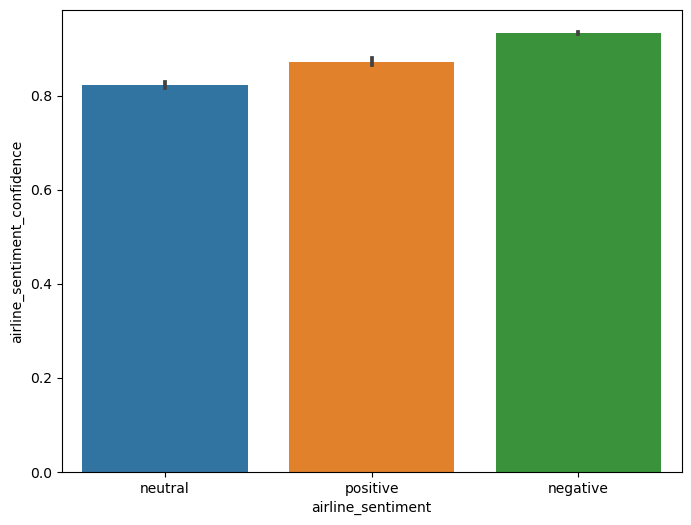

In [56]:
sns.barplot(x='airline_sentiment',y='airline_sentiment_confidence',data=tweet)

#OUTPUT The confidence of negative tweet is higher followed by positive and neutral

## DATA CLEANING

#The "Data Cleaning" section explains that tweets need to be cleaned of slang and punctuation before being used for machine learning. Before this cleaning, the dataset is divided into features (the tweet text) and labels (the sentiment). The tweet text is in the 11th column (index 10), and the sentiment is in the 2nd column (index 1). The iloc method from pandas is used to create these feature and label sets.

In [68]:
features = tweet.iloc[:,10].values
labels = tweet.iloc[:,1].values

In [74]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'^\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with a single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


## TF-IDF

#n bag-of-words, each word has the same weight. The idea behind the TF-IDF approach is that words that occur more frequently in all documents are less informative than words which are rare. Term Frequency and Inverse Document Frequency.

#TF-IDF is a combination of two terms: Term Frequency and Inverse Document Frequency. They can be calculated as:

#TF = (Number of times term t appears in a document) / (Total number of terms in the document)
#IDF = Log(Total number of documents / Number of documents with term t)

In [79]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()


#max_features=2500: Limits the number of features (terms) to 2500. This means only the top 2500 terms based on term frequency will be considered.

min_df=7: Ignores terms that appear in fewer than 7 documents. This helps in removing rare words that might not be useful for the analysis.

max_df=0.8: Ignores terms that appear in more than 80% of the documents. This helps in removing common words that might not be useful for distinguishing between documents.

stop_words=stopwords.words(‘english’): Removes common English stop words (like “the”, “is”, “in”, etc.) using the NLTK library’s list of stop words.

fit_transform(corpus): Fits the TF-IDF vectorizer to the corpus (a collection of text documents) and transforms the corpus into a TF-IDF feature matrix.

toarray(): Converts the sparse matrix to a dense array format, which is easier to work with for machine learning algorithms.

## DIVIDING TRAIN AND TEST DATA

In [101]:
from sklearn.model_selection import train_test_split 

In [105]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0) 

## NAIVE BAYES

In [108]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [110]:
nb.fit(X_train , y_train)

MultinomialNB()

In [112]:
pred = nb.predict(X_test)
pred

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [116]:
from sklearn.metrics import confusion_matrix ,recall_score,precision_score,accuracy_score,f1_score,classification_report

In [118]:
confusion_matrix(y_test,pred)

array([[1823,   40,    7],
       [ 388,  204,   22],
       [ 213,   38,  193]], dtype=int64)

In [120]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.75      0.97      0.85      1870
     neutral       0.72      0.33      0.46       614
    positive       0.87      0.43      0.58       444

    accuracy                           0.76      2928
   macro avg       0.78      0.58      0.63      2928
weighted avg       0.76      0.76      0.73      2928



#Summary
The model performs best on the “negative” class with high precision and recall.
The “neutral” class has the lowest performance, with lower precision, recall, and F1-score.
The overall accuracy is 76%, which is decent.


## LOGISTIC REGRESSION

In [126]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [128]:
logreg_tweet = LogisticRegression()
logreg_tweet.fit(X_train , y_train)


LogisticRegression()

In [130]:
pred_log = logreg_tweet.predict(X_test)

In [132]:
confusion_matrix(y_test,pred_log)

array([[1732,  115,   23],
       [ 268,  304,   42],
       [ 118,   54,  272]], dtype=int64)

In [134]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1870
     neutral       0.64      0.50      0.56       614
    positive       0.81      0.61      0.70       444

    accuracy                           0.79      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928



#The model performs well on the “negative” class, reasonably on the “positive” class, and less effectively on the “neutral” class. The overall accuracy is 79%, indicating a fairly reliable model.

## DECISION TREE 

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
dt_tweet = DecisionTreeClassifier()


In [142]:
dt_tweet.fit(X_train , y_train)

DecisionTreeClassifier()

In [145]:
dt_pred_tweet = dt_tweet.predict(X_test)

In [147]:
confusion_matrix(y_test,dt_pred_tweet)

array([[1440,  302,  128],
       [ 260,  289,   65],
       [ 120,   87,  237]], dtype=int64)

In [149]:
print(classification_report(y_test,dt_pred_tweet))

              precision    recall  f1-score   support

    negative       0.79      0.77      0.78      1870
     neutral       0.43      0.47      0.45       614
    positive       0.55      0.53      0.54       444

    accuracy                           0.67      2928
   macro avg       0.59      0.59      0.59      2928
weighted avg       0.68      0.67      0.67      2928



#The model performs best on the “negative” class, moderately on the “positive” class, and less effectively on the “neutral” class. The overall accuracy is 67%, indicating a moderate level of reliability.

## Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [156]:
rfc.fit(X_train , y_train)

RandomForestClassifier()

In [157]:
rf_pred_tweet = rfc.predict(X_test)

In [160]:
confusion_matrix(y_test,rf_pred_tweet)

array([[1729,   97,   44],
       [ 329,  241,   44],
       [ 145,   58,  241]], dtype=int64)

In [162]:
print(classification_report(y_test,rf_pred_tweet))

              precision    recall  f1-score   support

    negative       0.78      0.92      0.85      1870
     neutral       0.61      0.39      0.48       614
    positive       0.73      0.54      0.62       444

    accuracy                           0.76      2928
   macro avg       0.71      0.62      0.65      2928
weighted avg       0.74      0.76      0.74      2928



#The model performs best on the “negative” class, moderately on the “positive” class, and less effectively on the “neutral” class. The overall accuracy is 76%, indicating a fairly reliable model.

## Summary



Logistic Regression has the highest accuracy (0.79) and the best macro and weighted average F1-scores (0.71 and 0.78, respectively), indicating it performs the best overall.

Naive Bayes and Random Forest have similar accuracy (0.76), but Naive Bayes has a slightly better macro average F1-score (0.65 vs. 0.63).

Decision Tree  has the lowest accuracy (0.67) and F1-scores, indicating it performs the worst among the four models.
    
Based on these metrics, the Logistic Regression model is performing the best overall.